In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from numpy import pi

In [23]:
v_i = 20 #meters per second
theta_i = 20 * (pi)/180 #radians
omega = 2000 * (2*pi)/60  #radians per second

rho_air = 1.293 #kg/m-3
r = 3.35/100 #meters
m = 56/1000 #kilograms
g = 9.81 #meters per second squared

k2 = r * (pi/2) * rho_air  #Magnus constant
k = k2 * omega / m

del_t = 0.1 #seconds
d = 20 #meters

Differential Equations
    Assumption : Drag Force is negligible.

    Magnus Force M(t) = k2 * w * v(t)

    k2 depends on radius of ball r, density of air rho,

    x_double_dot = k * y
    y_double_dot = -g - k * x

    k = k2 * w / m

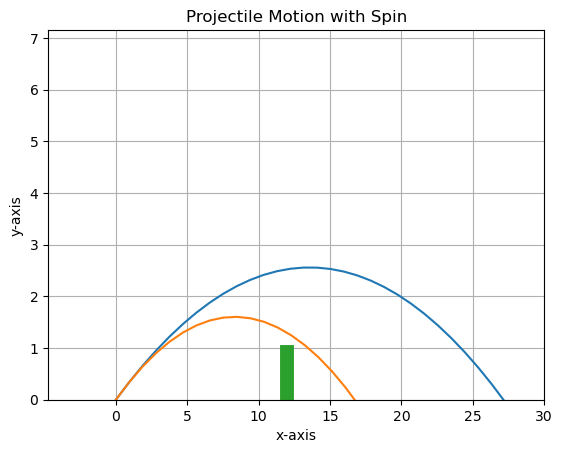

In [30]:
class ProjectileModel:
    def __init__(self,initial_x, initial_y, initial_velocity, launch_angle,del_t,k,distance = 20,net = 12):
        self.x = initial_x
        self.y = initial_y
        self.v_x = initial_velocity * np.cos(launch_angle)
        self.v_y = initial_velocity * np.sin(launch_angle)
        self.del_t = del_t
        self.x_trajectory = [self.x]
        self.y_trajectory = [self.y]
        self.time = 0
        self.g = 9.81 #m/s
        self.k = k #constant
        self.net = net #distance to net
        self.net_height = 91.6/100 #m
        self.distance = distance #distance  to bounce

    def update_position(self):
        #Given : position at time t
        #Required : Velocity at time t
        #Output : position at time t + del_t

        current_x = self.x
        current_y = self.y
        current_v_x = self.v_x
        current_v_y = self.v_y
        del_t = self.del_t

        #Update position using current velocity and current position
        self.x = current_x + current_v_x * del_t
        self.y = current_y + current_v_y * del_t

        #Update velocity to be used in next position update step
        self.v_x = self.k * current_y * del_t + current_v_x
        self.v_y = current_v_y - (self.g + self.k * current_v_x) * del_t

        #Update simulation time
        self.time += del_t

        #Append new position coordinates to list
        self.x_trajectory.append(self.x)
        self.y_trajectory.append(self.y)

    def simulate(self, T):
        #Simulate projectile motion until a given time T
        del_t = self.del_t

        while self.time <= T:
            self.update_position()
        
    def plot_trajectory(self):
        plt.plot(self.x_trajectory,self.y_trajectory)
        plt.title("Projectile Motion with Spin")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.xlim(right = 30)
        plt.ylim(bottom = 0)

    def plot_net(self):
        plt.plot([self.net,self.net],[0,self.net_height],linewidth = 10)




projectile1 = ProjectileModel(0,0,v_i,theta_i,0.05,k = 0)
projectile2 = ProjectileModel(0,0,v_i,theta_i,0.05,k = 0.35)

projectile1.simulate(T = 5)
projectile1.plot_trajectory()
projectile2.simulate(T = 5)
projectile2.plot_trajectory()
projectile2.plot_net()
plt.grid()
plt.show()